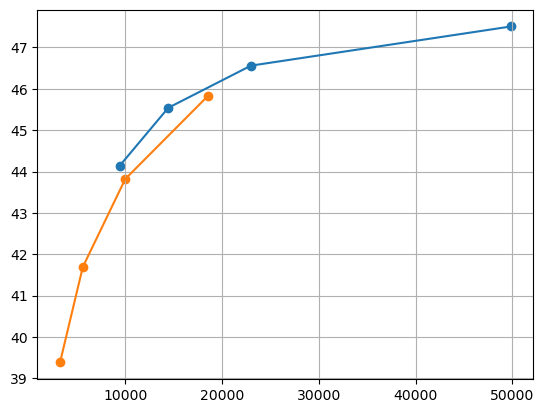

In [27]:
import source.vvc_log as vl
import source.gprof_log_analysis.gprof_log as gp
from source.common.vvc_std_path import vvc_make_path, gprof_make_path
import os

qps = (22, 27, 32, 37)
file1 = 'FoodMarket4'
file2 = 'Johnny'
cfg = 'AI'
dir = 'output'
vers = 'Precise'

videos1 = vvc_make_path(dir, cfg, file1, vers, qps)
videos2 = vvc_make_path(dir, cfg, file2, vers, qps)

df1 = vl.VVC_Output()
df1 = df1.read_multifile(videos1, qps)

df2 = vl.VVC_Output()
df2 = df2.read_multifile(videos2, qps)

df = vl.BD_Rate(vers, file1+"_"+file2, cfg)
df.calc_bdbr(df2, df1).head(33).to_excel(file1+"_"+file2+'.xlsx')

df2_1 = df2[df2['frame']==-1]
df1_1 = df1[df1['frame']==-1]
import matplotlib.pyplot as plt
plt.scatter( df1_1['bitrate'], df1_1['YUV_PSNR'])
plt.plot( df1_1['bitrate'], df1_1['YUV_PSNR'])
plt.scatter( df2_1['bitrate'], df2_1['YUV_PSNR'])
plt.plot( df2_1['bitrate'], df2_1['YUV_PSNR'])
plt.grid()

nan

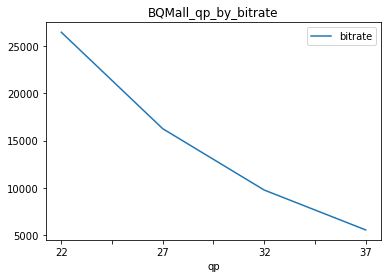

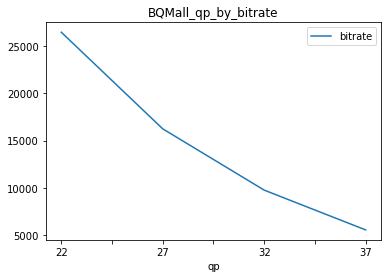

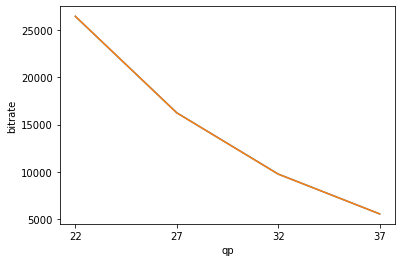

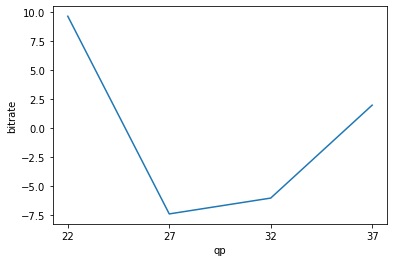

In [8]:
import source.vvc_log as vl
import os
qps = (22, 27, 32, 37)
satds = os.listdir('../out/')
file = 'BQMall'
cfg = 'intra'

dfs = []
for satd in satds:
    for qp in qps:
        dfs.append(vl.read_log(f'../out/{satd}/{file}/{cfg}/exec_log/log_{file}_qp{qp}_{cfg}_{satd}_exec.gplog'))

dfs = vl.split(dfs)
for key in dfs.keys():
    dfs[key].plot(y='bitrate', x='qp', save=False)

keys = list(dfs.keys())
dfs[keys[0]].compare(dfs[keys[1]], x='qp', y='bitrate')

dfs[keys[0]].difference(dfs[keys[1]], x='qp', y='bitrate')

